# Import Libraries

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pickle
import re
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import os
for dirname,_,filenames in os.walk("input"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

input/dataset.csv


# Data Loading

In [5]:
df=pd.read_csv("input/dataset.csv")

***Preliminary Analysis***

In [6]:
df.shape

(6019, 14)

In [7]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Data Preprocessing

***Nullvalues Analysis***

In [8]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
for feature in df.columns.tolist():
    print('{:<20} -> {}% null values'.format(feature, round(df[feature].isnull().sum()/df.shape[0],2)),'\n')

Unnamed: 0           -> 0.0% null values 

Name                 -> 0.0% null values 

Location             -> 0.0% null values 

Year                 -> 0.0% null values 

Kilometers_Driven    -> 0.0% null values 

Fuel_Type            -> 0.0% null values 

Transmission         -> 0.0% null values 

Owner_Type           -> 0.0% null values 

Mileage              -> 0.0% null values 

Engine               -> 0.01% null values 

Power                -> 0.01% null values 

Seats                -> 0.01% null values 

New_Price            -> 0.86% null values 

Price                -> 0.0% null values 



In [10]:
df=df.drop(labels=['Unnamed: 0','New_Price'],axis=1)
df=df.dropna()
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [11]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [12]:
alnum_features=['Mileage','Engine','Power']
for feature in alnum_features:
    df[feature]=df[feature].apply(lambda x: ' '.join(re.findall(r'\d+\.?\d*',str(x))))
    df[feature]=df[feature].apply(lambda x: x if x!='' else df[feature].mode())
    df[feature]=df[feature].apply(lambda x: float(x))

In [13]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.8+ KB


In [15]:
object_dtype_features=[column for column in df.columns.tolist() if df[column].dtype=='O']
print(object_dtype_features)

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']


In [16]:
df[object_dtype_features].head()

,Name,Location,Fuel_Type,Transmission,Owner_Type
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First
2,Honda Jazz V,Chennai,Petrol,Manual,First
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second


***Exploratory Data Analysis (EDA)***

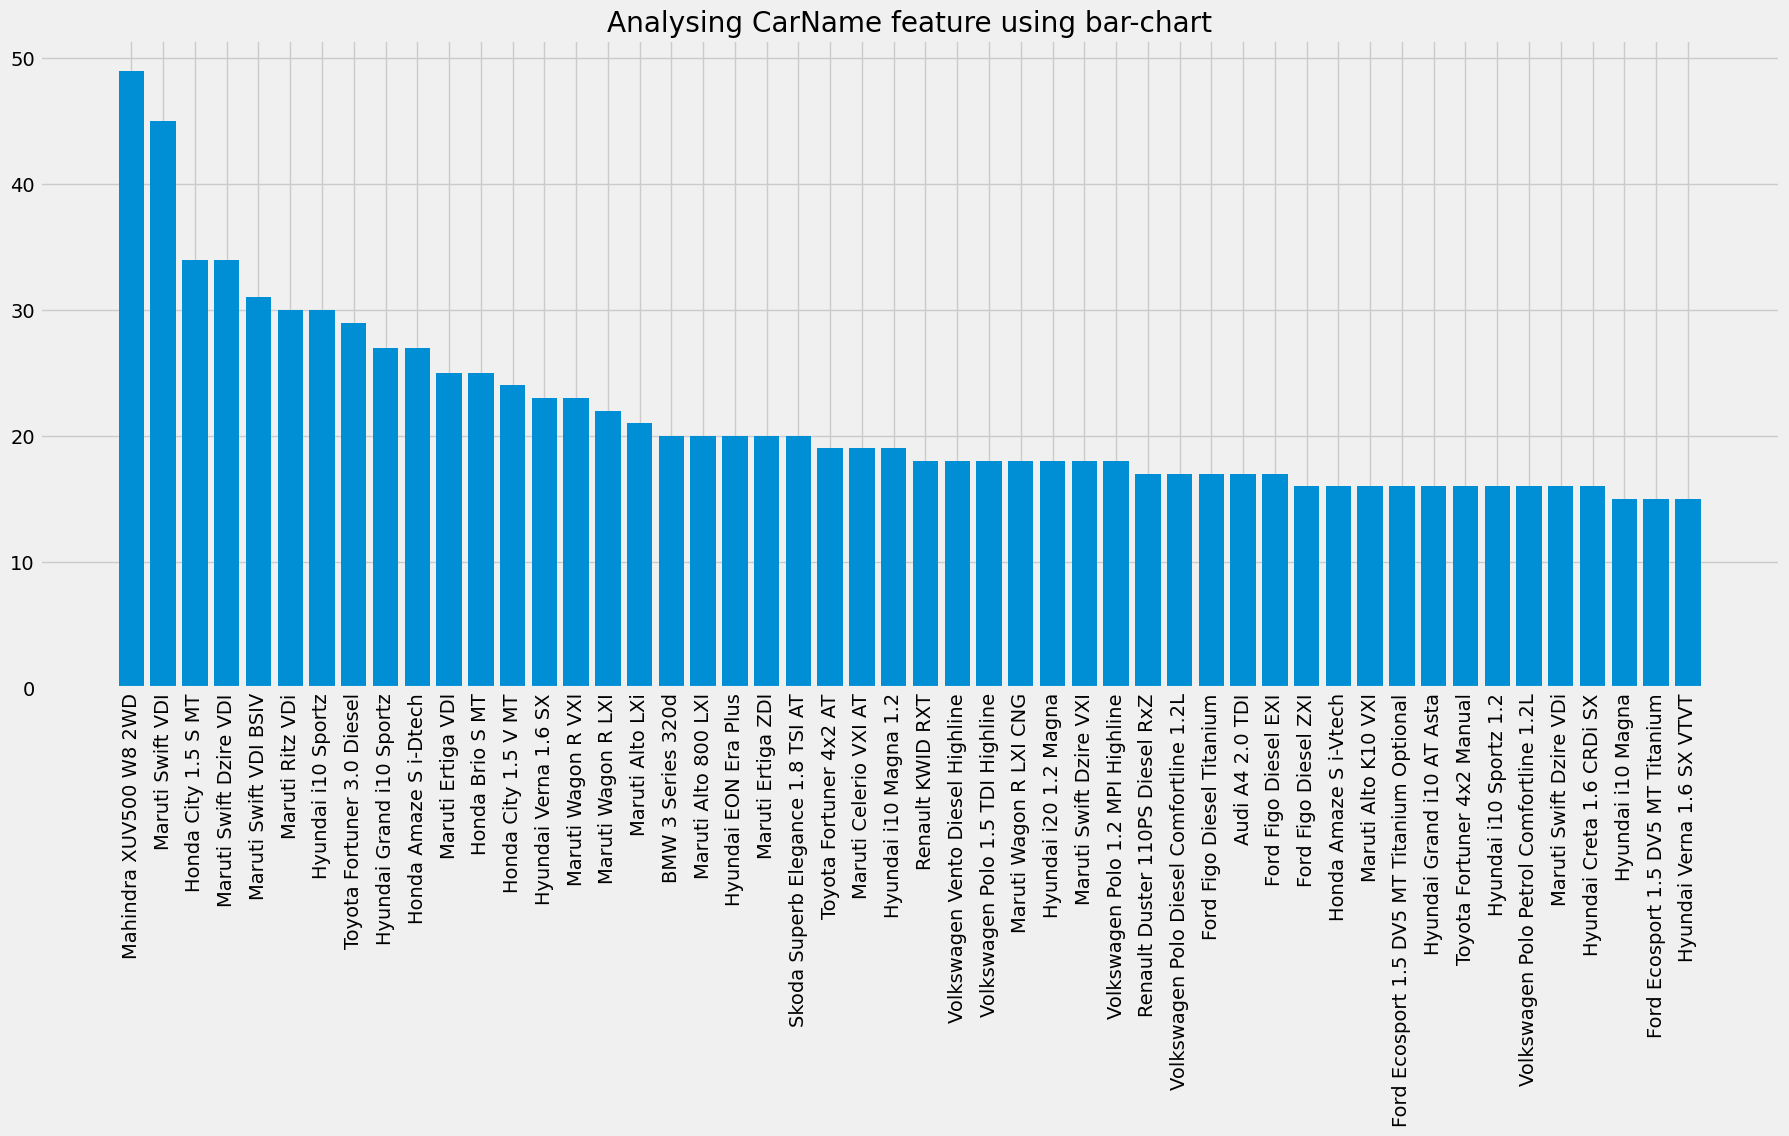

In [17]:
chart_data=list(dict(df['Name'].value_counts()).values())[:50]
chart_labels=list(dict(df['Name'].value_counts()).keys())[:50]
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(20,8))
    plt.bar(x=chart_labels,
           height=chart_data)
    plt.title(label='Analysing CarName feature using bar-chart')
    plt.xticks(rotation=90)
    plt.show()

In [18]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


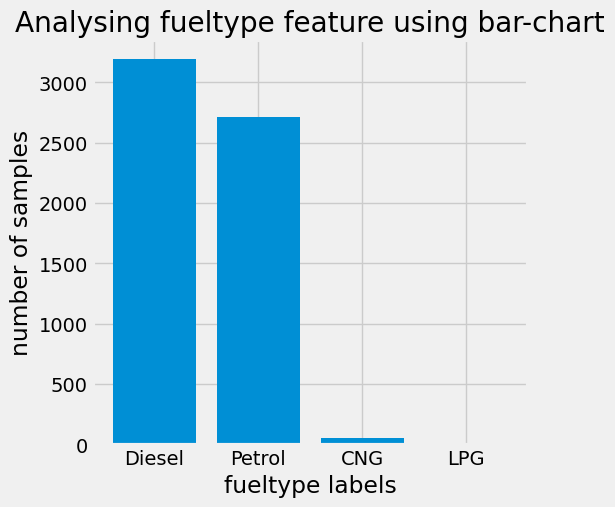

In [19]:
chart_data=list(dict(df['Fuel_Type'].value_counts()).values())
chart_labels=list(dict(df['Fuel_Type'].value_counts()).keys())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(5,5))
    plt.bar(x=chart_labels,
           height=chart_data)
    plt.title(label='Analysing fueltype feature using bar-chart')
    plt.xlabel(xlabel='fueltype labels')
    plt.ylabel(ylabel='number of samples')
    plt.show()

In [20]:
fueltype_price=df.groupby(by='Fuel_Type')['Price'].mean()

In [21]:
fueltype_price

Fuel_Type
CNG        3.516786
Diesel    12.839934
LPG        2.487000
Petrol     5.721054
Name: Price, dtype: float64

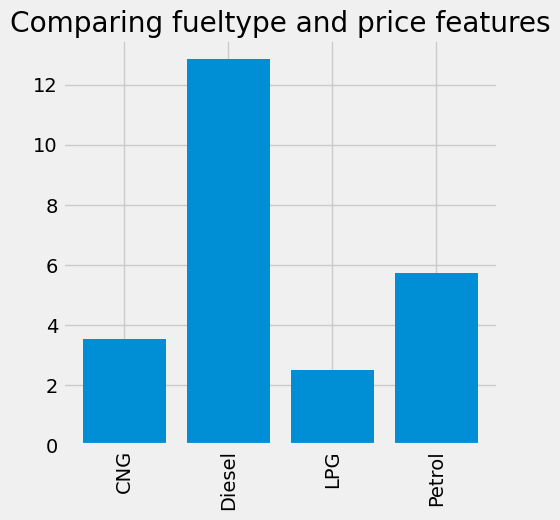

In [22]:
chart_data=list(dict(fueltype_price).values())
chart_labels=list(dict(fueltype_price).keys())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(5,5))
    plt.bar(x=chart_labels,
           height=chart_data)
    plt.title(label='Comparing fueltype and price features')
    plt.xticks(rotation=90)
    plt.show()

In [23]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


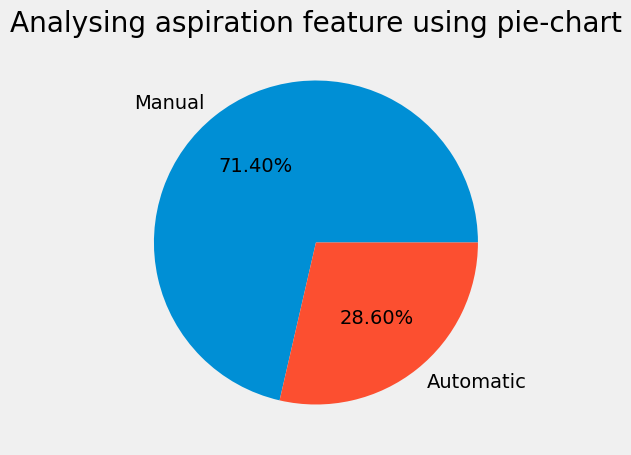

In [24]:
chart_data=list(dict(df['Transmission'].value_counts()).values())
chart_labels=list(dict(df['Transmission'].value_counts()).keys())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(5,5))
    plt.pie(labels=chart_labels,
           x=chart_data,
           autopct='%.2f%%')
    plt.title(label='Analysing aspiration feature using pie-chart')
    plt.show()

In [25]:
transmission_price=df.groupby(by='Transmission')['Price'].mean()

In [26]:
transmission_price

Transmission
Automatic    19.876852
Manual        5.345241
Name: Price, dtype: float64

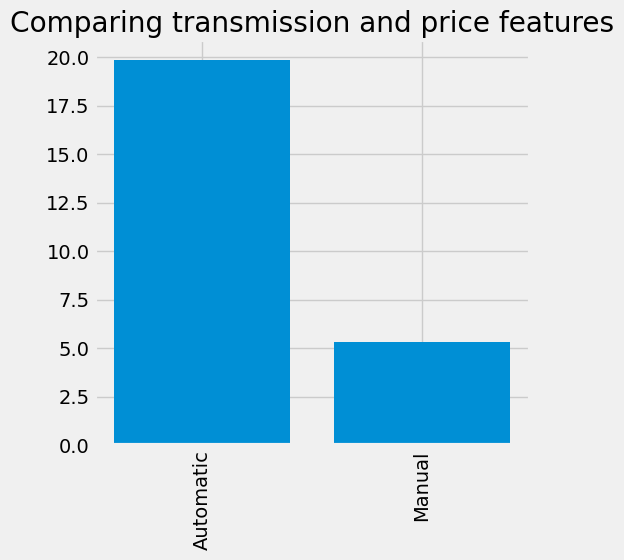

In [27]:
chart_data=list(dict(transmission_price).values())
chart_labels=list(dict(transmission_price).keys())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(5,5))
    plt.bar(x=chart_labels,
           height=chart_data)
    plt.title(label='Comparing transmission and price features')
    plt.xticks(rotation=90)
    plt.show()

In [28]:
ownertype_price=df.groupby(by='Owner_Type')['Price'].mean()

In [29]:
ownertype_price

Owner_Type
First             9.979721
Fourth & Above    3.396250
Second            7.622644
Third             4.956937
Name: Price, dtype: float64

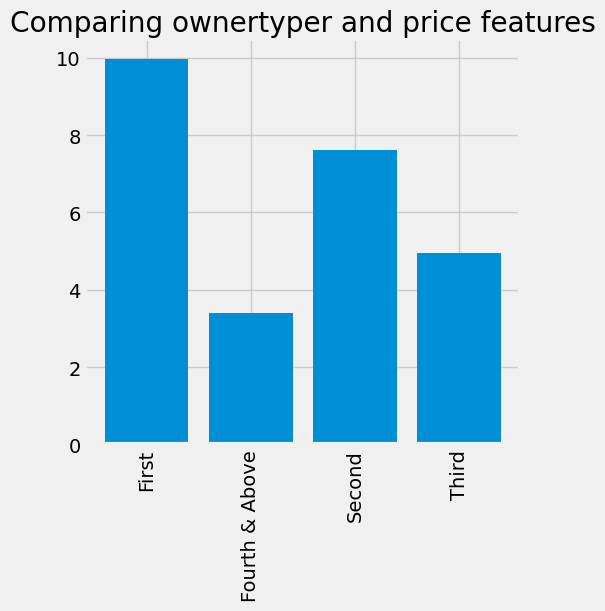

In [30]:
chart_data=list(dict(ownertype_price).values())
chart_labels=list(dict(ownertype_price).keys())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(5,5))
    plt.bar(x=chart_labels,
           height=chart_data)
    plt.title(label='Comparing ownertyper and price features')
    plt.xticks(rotation=90)
    plt.show()

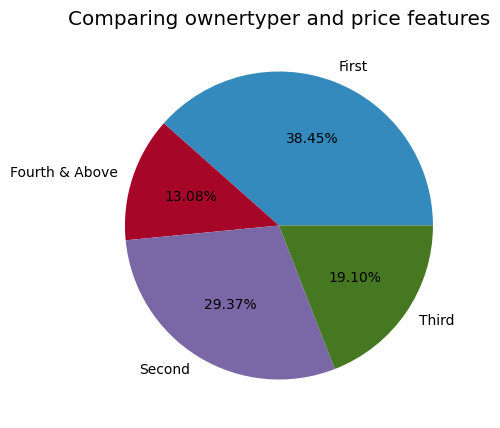

In [31]:
with plt.style.context(style='bmh'):
    plt.figure(figsize=(5,5))
    plt.pie(labels=chart_labels,
           x=chart_data,
           autopct='%.2f%%')
    plt.title(label='Comparing ownertyper and price features')
    plt.show()

In [32]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


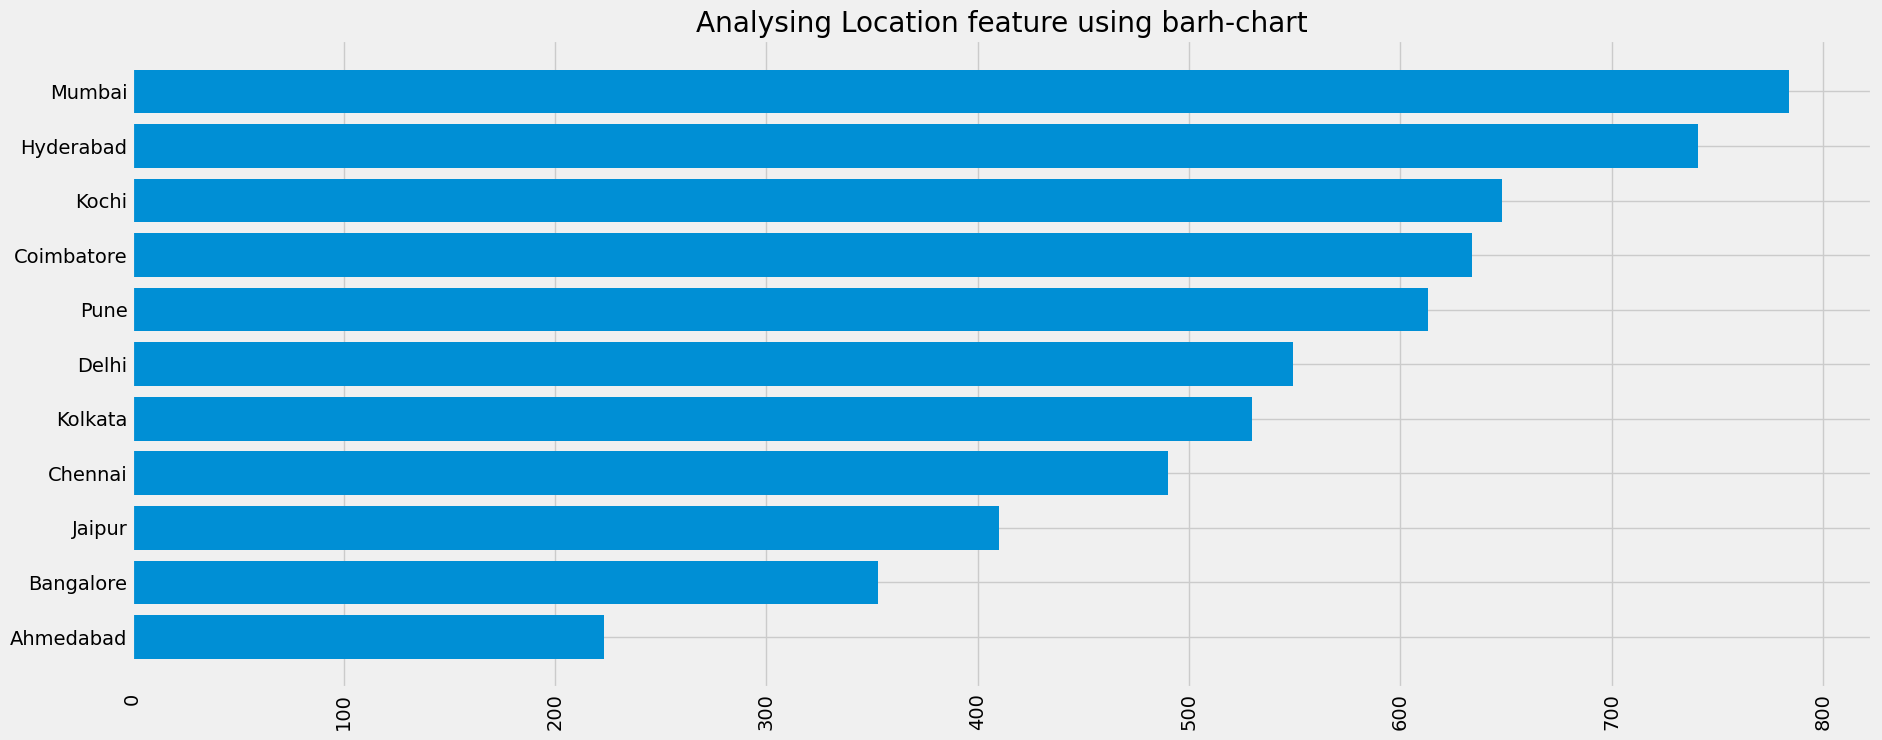

In [33]:
chart_data=list(dict(df['Location'].value_counts(ascending=True)).values())
chart_labels=list(dict(df['Location'].value_counts(ascending=True)).keys())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(20,8))
    plt.barh(y=chart_labels,
           width=chart_data)
    plt.title(label='Analysing Location feature using barh-chart')
    plt.xticks(rotation=90)
    plt.show()

In [34]:
location_price=df.groupby(by='Location')['Price'].mean()

In [35]:
location_price

Location
Ahmedabad      8.482018
Bangalore     13.479178
Chennai        7.780184
Coimbatore    15.058265
Delhi          9.729107
Hyderabad      9.781916
Jaipur         5.840146
Kochi         11.193164
Kolkata        5.672491
Mumbai         9.406327
Pune           6.762121
Name: Price, dtype: float64

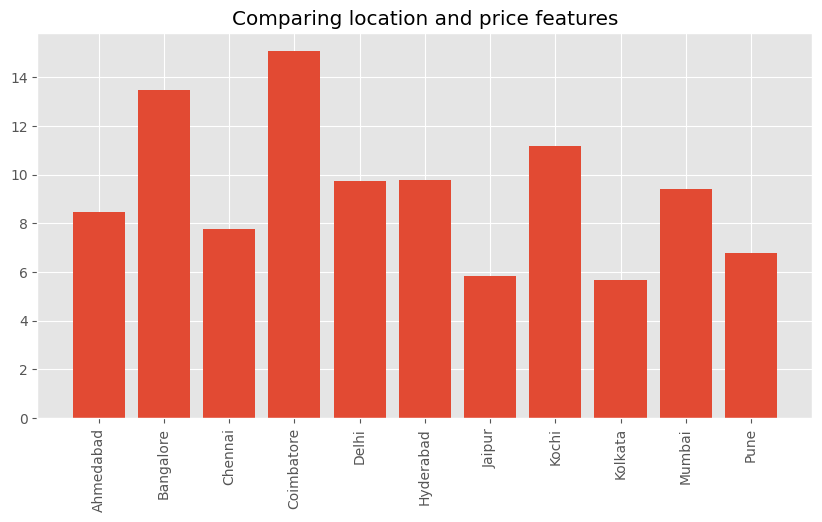

In [36]:
chart_data=list(dict(location_price).values())
chart_labels=list(dict(location_price).keys())
with plt.style.context(style='ggplot'):
    plt.figure(figsize=(10,5))
    plt.bar(x=chart_labels,
           height=chart_data)
    plt.title(label='Comparing location and price features')
    plt.xticks(rotation=90)
    plt.show()

In [37]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


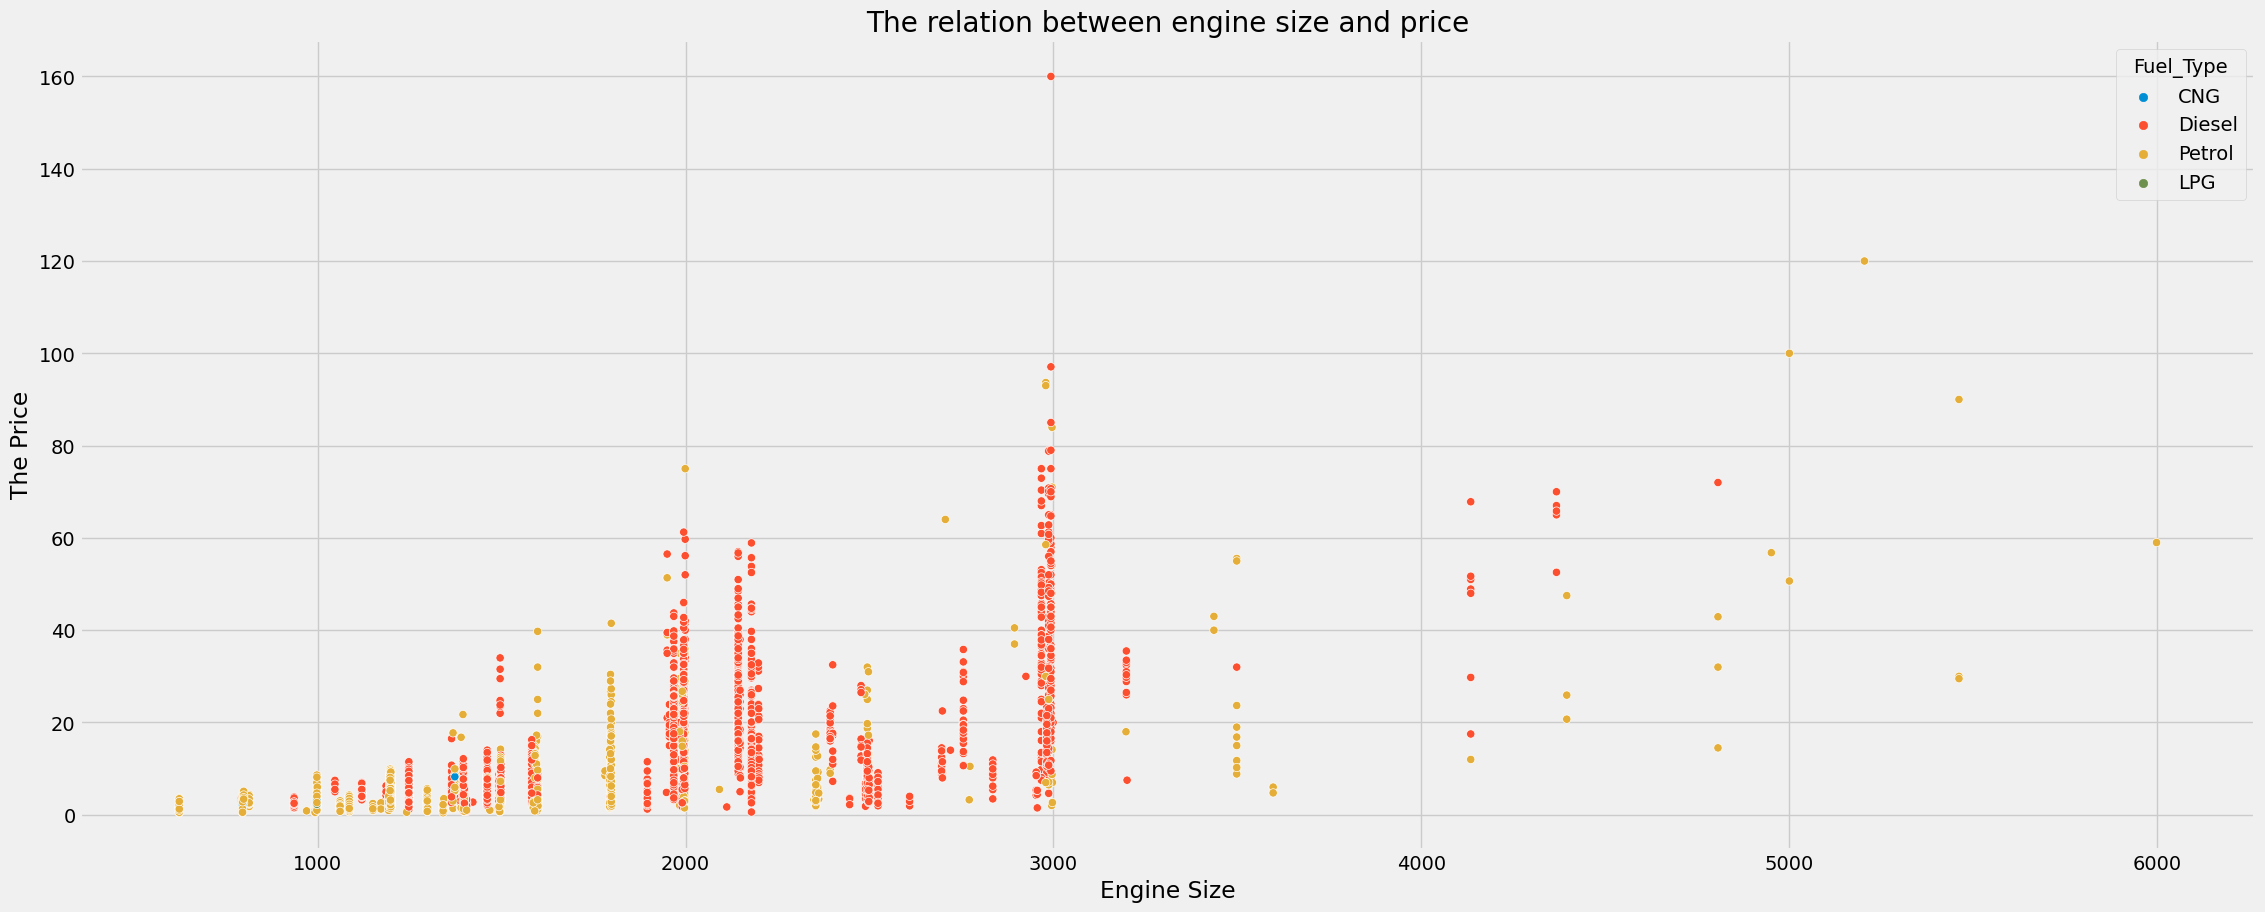

In [38]:
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(25,10))
    sns.scatterplot(data=df,x="Engine",y="Price",hue="Fuel_Type",markers=True)
    plt.title("The relation between engine size and price")
    plt.xlabel("Engine Size")
    plt.ylabel("The Price")
    plt.show()

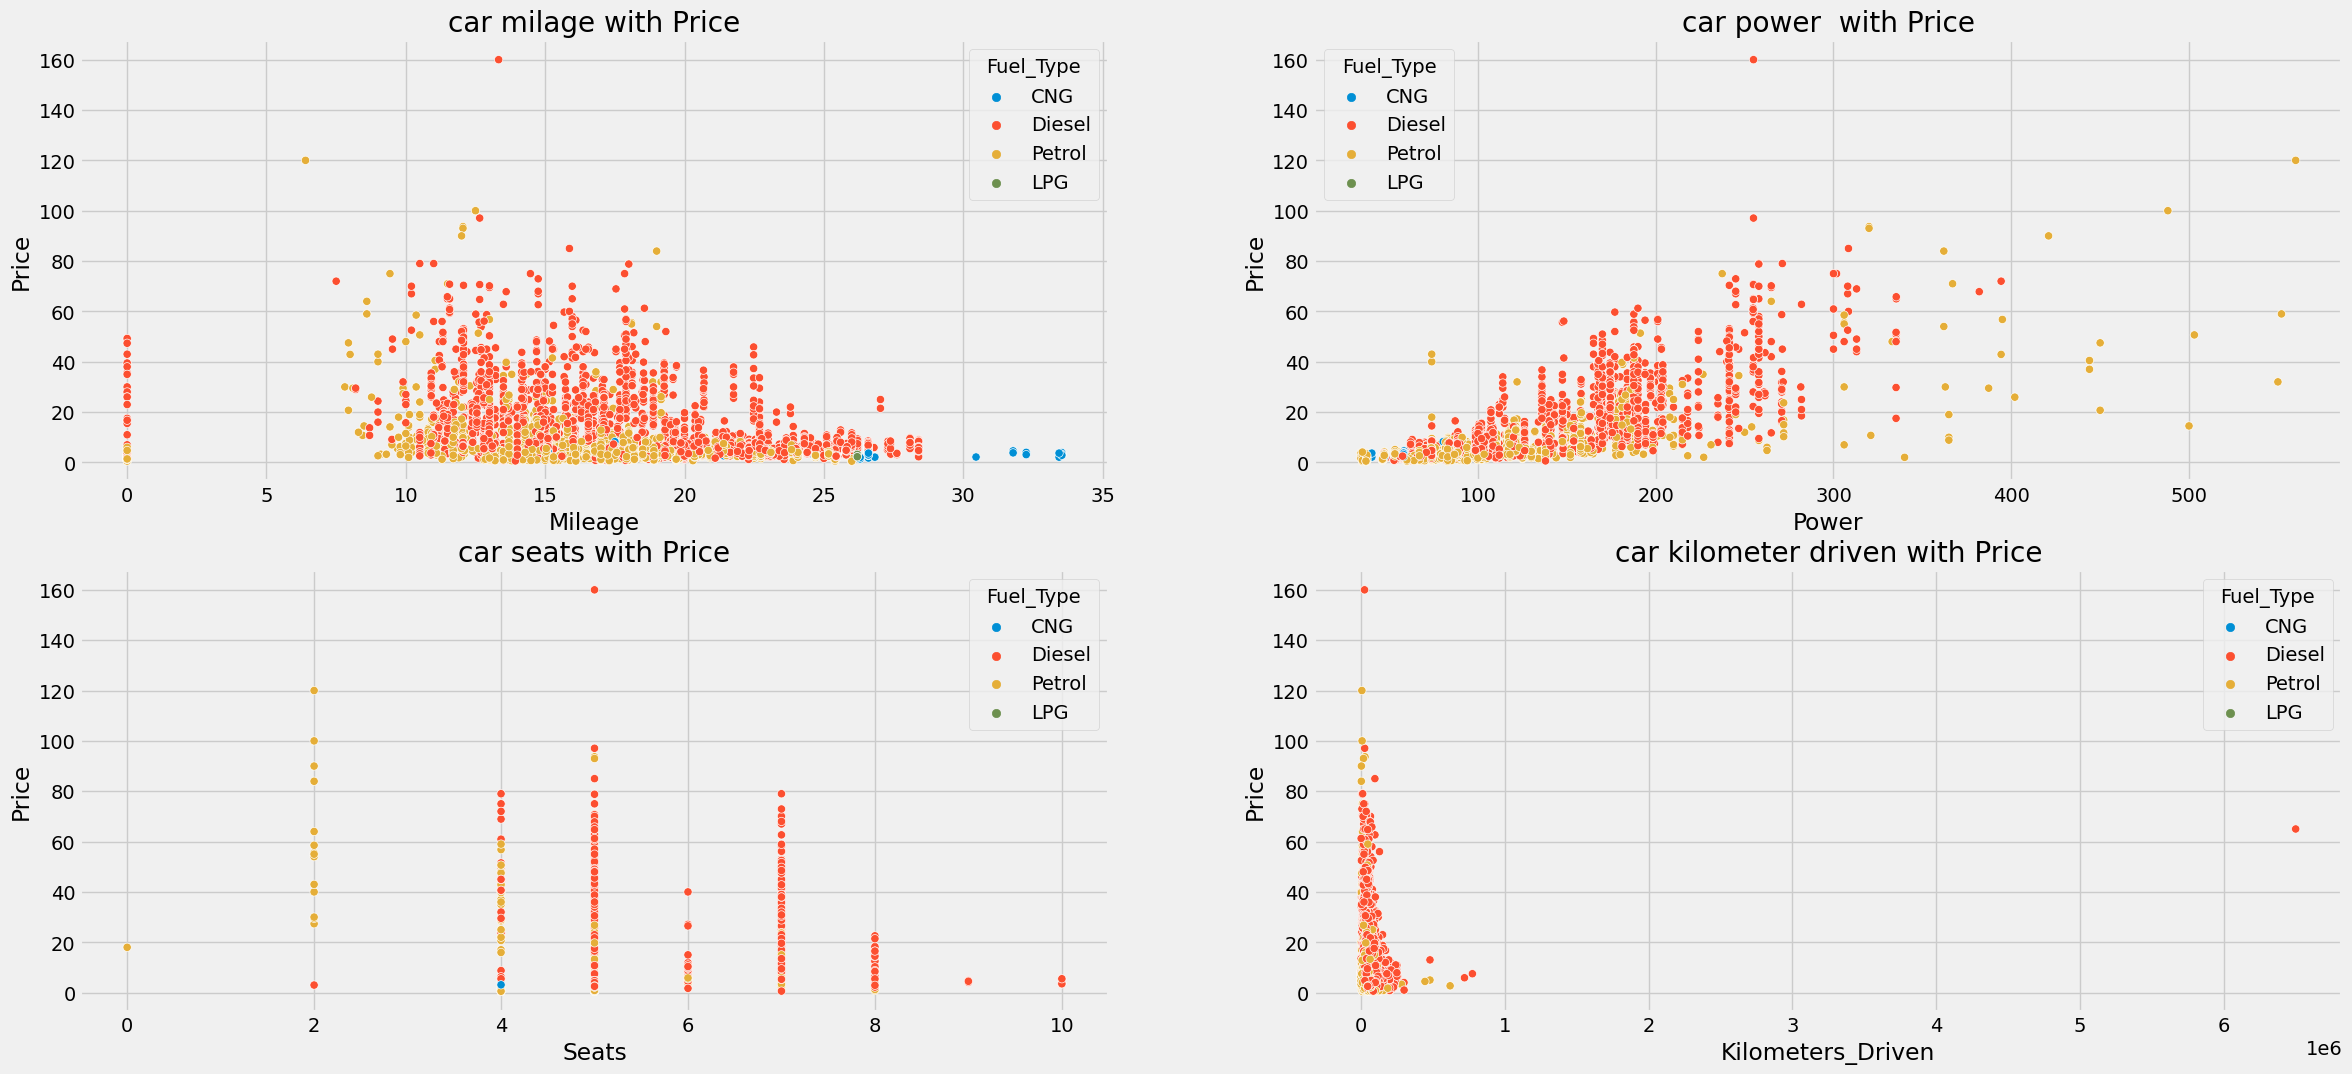

In [39]:
with plt.style.context(style='fivethirtyeight'):
    fig = plt.figure(figsize=(26, 12))

    ax1 = fig.add_subplot(221)
    sns.scatterplot(data=df,x="Mileage",y="Price",hue="Fuel_Type",markers=True)
    ax2 = fig.add_subplot(222)
    sns.scatterplot(data=df,x="Power",y="Price",hue="Fuel_Type",markers=True)
    ax3 = fig.add_subplot(223)
    sns.scatterplot(data=df,x="Seats",y="Price",hue="Fuel_Type",markers=True)
    ax4 = fig.add_subplot(224)
    sns.scatterplot(data=df,x="Kilometers_Driven",y="Price",hue="Fuel_Type",markers=True)
    ax1.title.set_text('car milage with Price')
    ax2.title.set_text('car power  with Price')
    ax3.title.set_text('car seats with Price')
    ax4.title.set_text('car kilometer driven with Price')
    plt.show()

***Label Encoding***

In [40]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.8+ KB


In [42]:
print(object_dtype_features)

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']


In [43]:
for label in object_dtype_features:
    unique_labels=df[label].unique().tolist()
    print('{:<20} -> {} unique values.'.format(label, len(unique_labels)))
    print(f'Unique labels: {unique_labels}','\n')
    num_adrs=list(range(1,len(unique_labels)+1))
    label_dict={}
    for label_name,num in zip(unique_labels,num_adrs):
        label_dict[label_name]=num
    print(f"feature name is {label} and generated dictionary {label_dict}",'\n')
    df[label]=df[label].map(label_dict)
    df[label]=df[label].astype(int)

Name                 -> 1855 unique values.
Unique labels: ['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option', 'Honda Jazz V', 'Maruti Ertiga VDI', 'Audi A4 New 2.0 TDI Multitronic', 'Hyundai EON LPG Era Plus Option', 'Nissan Micra Diesel XV', 'Toyota Innova Crysta 2.8 GX AT 8S', 'Volkswagen Vento Diesel Comfortline', 'Tata Indica Vista Quadrajet LS', 'Maruti Ciaz Zeta', 'Honda City 1.5 V AT Sunroof', 'Maruti Swift VDI BSIV', 'Land Rover Range Rover 2.2L Pure', 'Land Rover Freelander 2 TD4 SE', 'Mitsubishi Pajero Sport 4X4', 'Honda Amaze S i-Dtech', 'Maruti Swift DDiS VDI', 'Renault Duster 85PS Diesel RxL Plus', 'Mercedes-Benz New C-Class C 220 CDI BE Avantgare', 'BMW 3 Series 320d', 'Maruti S Cross DDiS 200 Alpha', 'Audi A6 2011-2015 35 TFSI Technology', 'Hyundai i20 1.2 Magna', 'Volkswagen Vento Petrol Highline AT', 'Honda City Corporate Edition', 'Maruti Alto K10 2010-2014 VXI', 'Honda WRV i-VTEC VX', 'Toyota Innova 2.5 V Diesel 7-seater', 'Renault Duster 110PS Diesel RxZ

In [44]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,1,2010,72000,1,1,1,26.60,998.0,58.16,5.0,1.75
1,2,2,2015,41000,2,1,1,19.67,1582.0,126.20,5.0,12.50
2,3,3,2011,46000,3,1,1,18.20,1199.0,88.70,5.0,4.50
3,4,3,2012,87000,2,1,1,20.77,1248.0,88.76,7.0,6.00
4,5,4,2013,40670,2,2,2,15.20,1968.0,140.80,5.0,17.74


In [45]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   int64  
 1   Location           5975 non-null   int64  
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   int64  
 5   Transmission       5975 non-null   int64  
 6   Owner_Type         5975 non-null   int64  
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 606.8 KB


In [47]:
curr_time = datetime.datetime.now()
df['Year'] = df['Year'].apply(lambda x : curr_time.year - x)

In [48]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,1,13,72000,1,1,1,26.60,998.0,58.16,5.0,1.75
1,2,2,8,41000,2,1,1,19.67,1582.0,126.20,5.0,12.50
2,3,3,12,46000,3,1,1,18.20,1199.0,88.70,5.0,4.50
3,4,3,11,87000,2,1,1,20.77,1248.0,88.76,7.0,6.00
4,5,4,10,40670,2,2,2,15.20,1968.0,140.80,5.0,17.74


***Data Normalization***

In [49]:
X=df.drop(labels='Price',axis=1)
y=df[['Price']]

In [50]:
scaler=MinMaxScaler()
scaler=scaler.fit(X.values)
X_scaled=scaler.transform(X.values)
scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
scaled_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0.000000,0.0,0.428571,0.011051,0.000000,0.0,0.000000,0.793083,0.069594,0.045569,0.5
1,0.000539,0.1,0.190476,0.006282,0.333333,0.0,0.000000,0.586464,0.178266,0.174971,0.5
2,0.001079,0.2,0.380952,0.007051,0.666667,0.0,0.000000,0.542636,0.106997,0.103652,0.5
3,0.001618,0.2,0.333333,0.013359,0.333333,0.0,0.000000,0.619261,0.116115,0.103766,0.7
4,0.002157,0.3,0.285714,0.006231,0.333333,1.0,0.333333,0.453190,0.250093,0.202739,0.5


In [51]:
with open(file='models/Features_Scaler.pkl',mode='wb') as file:
    pickle.dump(obj=scaler,file=file)

In [52]:
scaler1=MinMaxScaler()
scaler1=scaler1.fit(y.values)
y_scaled=scaler1.transform(y.values)
scaled_df['price']=y_scaled.ravel()
scaled_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,price
0,0.000000,0.0,0.428571,0.011051,0.000000,0.0,0.000000,0.793083,0.069594,0.045569,0.5,0.008210
1,0.000539,0.1,0.190476,0.006282,0.333333,0.0,0.000000,0.586464,0.178266,0.174971,0.5,0.075583
2,0.001079,0.2,0.380952,0.007051,0.666667,0.0,0.000000,0.542636,0.106997,0.103652,0.5,0.025445
3,0.001618,0.2,0.333333,0.013359,0.333333,0.0,0.000000,0.619261,0.116115,0.103766,0.7,0.034846
4,0.002157,0.3,0.285714,0.006231,0.333333,1.0,0.333333,0.453190,0.250093,0.202739,0.5,0.108423


In [53]:
with open(file='models/Target_Scaler.pkl',mode='wb') as file:
    pickle.dump(obj=scaler1,file=file)

# Feature Selection

In [54]:
X=scaled_df.drop(labels='price',axis=1)
X.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0.000000,0.0,0.428571,0.011051,0.000000,0.0,0.000000,0.793083,0.069594,0.045569,0.5
1,0.000539,0.1,0.190476,0.006282,0.333333,0.0,0.000000,0.586464,0.178266,0.174971,0.5
2,0.001079,0.2,0.380952,0.007051,0.666667,0.0,0.000000,0.542636,0.106997,0.103652,0.5
3,0.001618,0.2,0.333333,0.013359,0.333333,0.0,0.000000,0.619261,0.116115,0.103766,0.7
4,0.002157,0.3,0.285714,0.006231,0.333333,1.0,0.333333,0.453190,0.250093,0.202739,0.5


In [55]:
y=scaled_df[['price']]
y.head()

,price
0,0.008210
1,0.075583
2,0.025445
3,0.034846
4,0.108423


In [56]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor()
RF_model=RF_model.fit(X.values,y.values.ravel())

In [57]:
importances_df=pd.DataFrame()
importances_df['Features']=X.columns
importances_df['Importances']=data=RF_model.feature_importances_.tolist()
importances_df=importances_df.sort_values(by='Importances',ascending=False)
importances_df=importances_df.reset_index(drop=True)
importances_df

,Features,Importances
0,Power,0.659399
1,Year,0.162438
2,Engine,0.047042
3,Kilometers_Driven,0.044866
4,Name,0.029233
5,Mileage,0.023228
6,Location,0.011074
7,Seats,0.009365
8,Transmission,0.008132
9,Fuel_Type,0.003365


In [58]:
importances_df=importances_df.loc[importances_df['Importances']>=0.009]
importances_df

,Features,Importances
0,Power,0.659399
1,Year,0.162438
2,Engine,0.047042
3,Kilometers_Driven,0.044866
4,Name,0.029233
5,Mileage,0.023228
6,Location,0.011074
7,Seats,0.009365


In [59]:
imp_columns=importances_df['Features'].values.tolist()
imp_columns

['Power',
 'Year',
 'Engine',
 'Kilometers_Driven',
 'Name',
 'Mileage',
 'Location',
 'Seats']

In [60]:
with open('Important_Columns.txt', 'w') as f:
    for item in imp_columns:
        f.write(str(item) + '\n')

In [61]:
X=X[importances_df['Features'].values.tolist()]
X.head()

,Power,Year,Engine,Kilometers_Driven,Name,Mileage,Location,Seats
0,0.045569,0.428571,0.069594,0.011051,0.000000,0.793083,0.0,0.5
1,0.174971,0.190476,0.178266,0.006282,0.000539,0.586464,0.1,0.5
2,0.103652,0.380952,0.106997,0.007051,0.001079,0.542636,0.2,0.5
3,0.103766,0.333333,0.116115,0.013359,0.001618,0.619261,0.2,0.7
4,0.202739,0.285714,0.250093,0.006231,0.002157,0.453190,0.3,0.5


# Data Splitting

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4780, 8) (1195, 8) (4780, 1) (1195, 1)


In [63]:
X_train.head()

,Power,Year,Engine,Kilometers_Driven,Name,Mileage,Location,Seats
1881,0.103652,0.142857,0.106997,0.003323,0.541532,0.557543,0.7,0.5
2836,0.062381,0.047619,0.069780,0.000608,0.521036,0.646989,0.4,0.5
4096,0.164511,0.285714,0.180685,0.004281,0.079827,0.441264,0.8,0.5
1173,0.343857,0.238095,0.330480,0.013347,0.404531,0.333930,0.6,0.5
3358,0.431343,0.428571,0.439710,0.007051,0.761057,0.351819,0.4,0.7


In [64]:
X_test.head()

,Power,Year,Engine,Kilometers_Driven,Name,Mileage,Location,Seats
5957,0.266508,0.285714,0.250093,0.014113,0.338188,0.527132,0.6,0.5
4333,0.122480,0.190476,0.162635,0.012010,0.860841,0.775194,0.5,0.5
2585,0.258273,0.428571,0.282657,0.011391,0.181769,0.442457,0.5,0.5
1755,0.248764,0.190476,0.439710,0.010589,0.289105,0.000000,0.1,0.5
4773,0.134652,0.095238,0.348716,0.004374,0.483819,0.493441,0.3,0.6


In [65]:
y_train.head()

,price
1881,0.028265
2836,0.027325
4096,0.069692
1173,0.104914
3358,0.172725


In [66]:
y_test.head()

,price
5957,0.107295
4333,0.038606
2585,0.069316
1755,0.235397
4773,0.057784


# Algorithm:1 SupportVectorRegressor

In [67]:
from sklearn.svm import SVR
svr_model=SVR()
svr_model.fit(X_train.values,y_train.values.ravel())

SVR()

In [68]:
svr_pred=svr_model.predict(X_test.values)
print(svr_pred)

[ 0.11430752  0.07277076  0.08030835 ... -0.0031166   0.31882866
  0.04289231]


In [69]:
print(y_test.values.ravel())

[0.10729506 0.03860617 0.06931562 ... 0.00758335 0.29618952 0.01347456]


In [70]:
result_df=pd.DataFrame()
result_df['True Price']=y_test.values.ravel()
result_df['SVR Prediction']=svr_pred

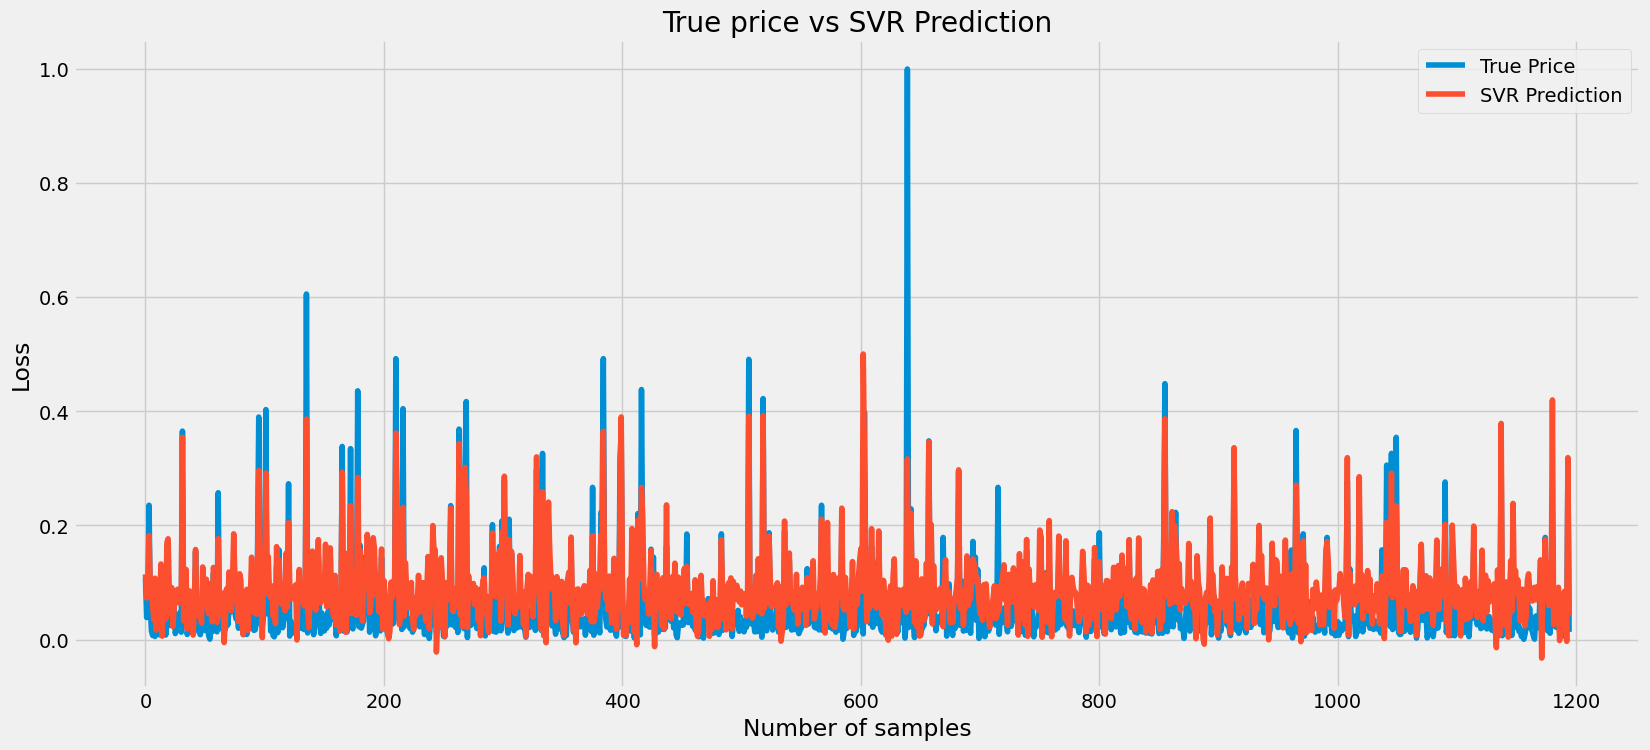

In [71]:
with plt.style.context(style='fivethirtyeight'):
    result_df[['True Price','SVR Prediction']].plot(figsize=(18,8))
    plt.title(label='True price vs SVR Prediction')
    plt.xlabel(xlabel='Number of samples')
    plt.ylabel(ylabel='Loss')
    plt.show()

In [73]:
MSE=mean_squared_error(y_true=result_df['True Price'].values.ravel(),y_pred=result_df['SVR Prediction'].values.ravel())
MAE=mean_absolute_error(y_true=result_df['True Price'].values.ravel(),y_pred=result_df['SVR Prediction'].values.ravel())
R2_SCORE=r2_score(y_true=result_df['True Price'].values.ravel(),y_pred=result_df['SVR Prediction'].values.ravel())
print(f'Mean Squared Error: {MSE:.5f}%')
print(f'Mean Absolute Error: {MAE:.5f}%')
print(f'R2 Score: {R2_SCORE*100.0:.2f}%')

Mean Squared Error: 0.00295%
Mean Absolute Error: 0.04120%
R2 Score: 48.41%


In [74]:
with open('models/SupportVectorRegressor_model.pkl',mode='wb') as file:
    pickle.dump(obj=svr_model,file=file)

# Algorithm:2 ConvolutionalBi-DirectionalGatedRecurrentUnit

In [75]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten,Dense,Dropout,GRU,Bidirectional

In [76]:
x_train=np.reshape(a=X_train.values,newshape=(X_train.shape[0],X_train.shape[1],1))
x_test=np.reshape(a=X_test.values,newshape=(X_test.shape[0],X_test.shape[1],1))

In [77]:
bigru_model = Sequential()
bigru_model.add(Conv1D(filters=16, kernel_size=3, padding='same',activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
bigru_model.add(Conv1D(filters=16, kernel_size=3, padding='same',activation='relu'))
bigru_model.add(MaxPooling1D())
bigru_model.add(Conv1D(filters=32, kernel_size=3, padding='same',activation='relu'))
bigru_model.add(Conv1D(filters=32, kernel_size=3, padding='same',activation='relu'))
bigru_model.add(MaxPooling1D())
bigru_model.add(Bidirectional(GRU(units=64, return_sequences=True)))
bigru_model.add(Bidirectional(GRU(units=64, return_sequences=True)))
bigru_model.add(Flatten())
bigru_model.add(Dense(256, activation='relu'))
bigru_model.add(Dense(1, activation='linear'))
bigru_model.compile(optimizer='sgd', loss='mse',metrics=['mae'])
bigru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 16)             64        
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 16)             784       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 16)            0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 32)             1568      
                                                                 
 conv1d_3 (Conv1D)           (None, 4, 32)             3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 32)            0         
 1D)                                                    

In [78]:
history=bigru_model.fit(x=x_train,y=y_train.values.ravel(),batch_size=32,epochs=1000,validation_data=(x_test,y_test.values.ravel()))

Epoch 1/1000
150/150 [==============================] - 19s 20ms/step - loss: 0.0049 - mae: 0.0431 - val_loss: 0.0057 - val_mae: 0.0467
Epoch 2/1000
150/150 [==============================] - 1s 9ms/step - loss: 0.0047 - mae: 0.0449 - val_loss: 0.0057 - val_mae: 0.0450
Epoch 3/1000
150/150 [==============================] - 1s 9ms/step - loss: 0.0047 - mae: 0.0446 - val_loss: 0.0057 - val_mae: 0.0450
Epoch 4/1000
150/150 [==============================] - 1s 9ms/step - loss: 0.0047 - mae: 0.0446 - val_loss: 0.0056 - val_mae: 0.0441
Epoch 5/1000
150/150 [==============================] - 1s 9ms/step - loss: 0.0047 - mae: 0.0445 - val_loss: 0.0056 - val_mae: 0.0437
Epoch 6/1000
150/150 [==============================] - 1s 9ms/step - loss: 0.0047 - mae: 0.0444 - val_loss: 0.0056 - val_mae: 0.0438
Epoch 7/1000
150/150 [==============================] - 1s 10ms/step - loss: 0.0046 - mae: 0.0443 - val_loss: 0.0056 - val_mae: 0.0447
Epoch 8/1000
150/150 [==============================] - 2s 

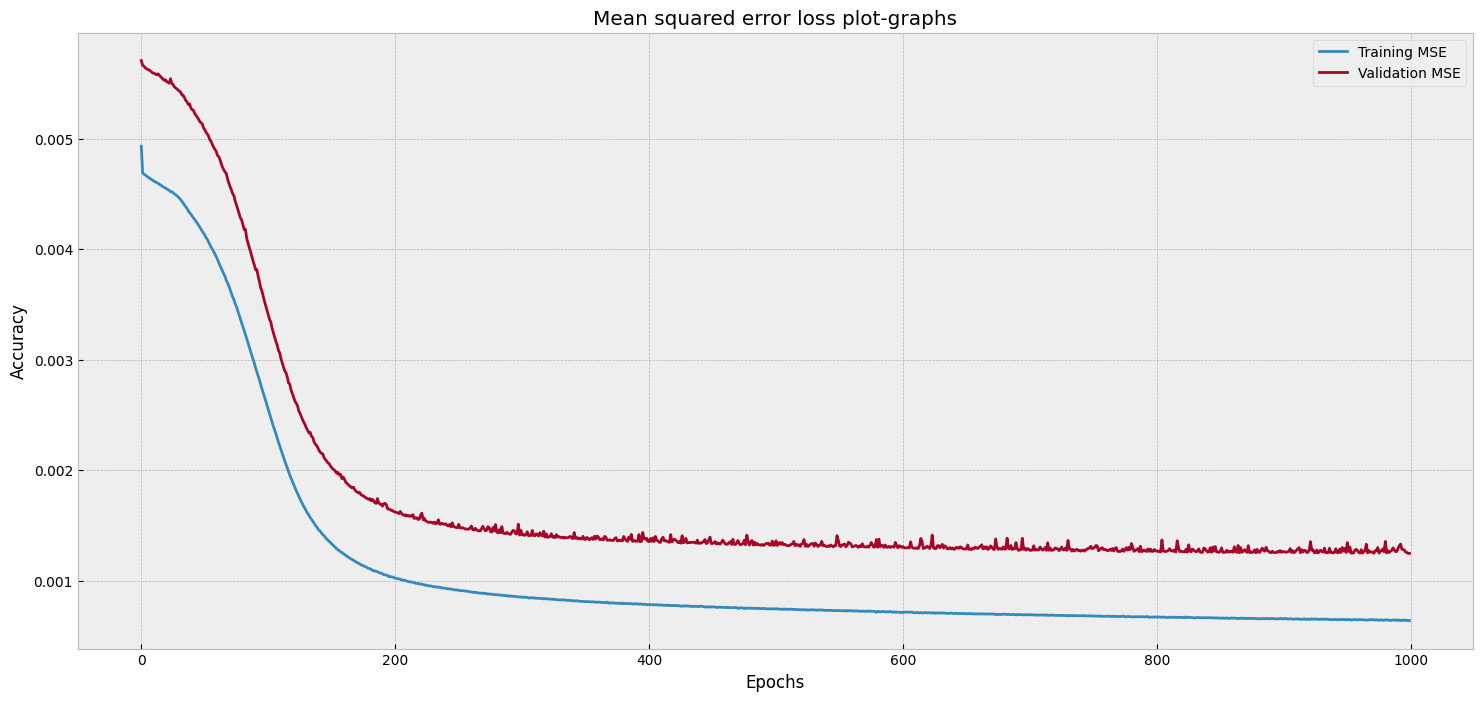

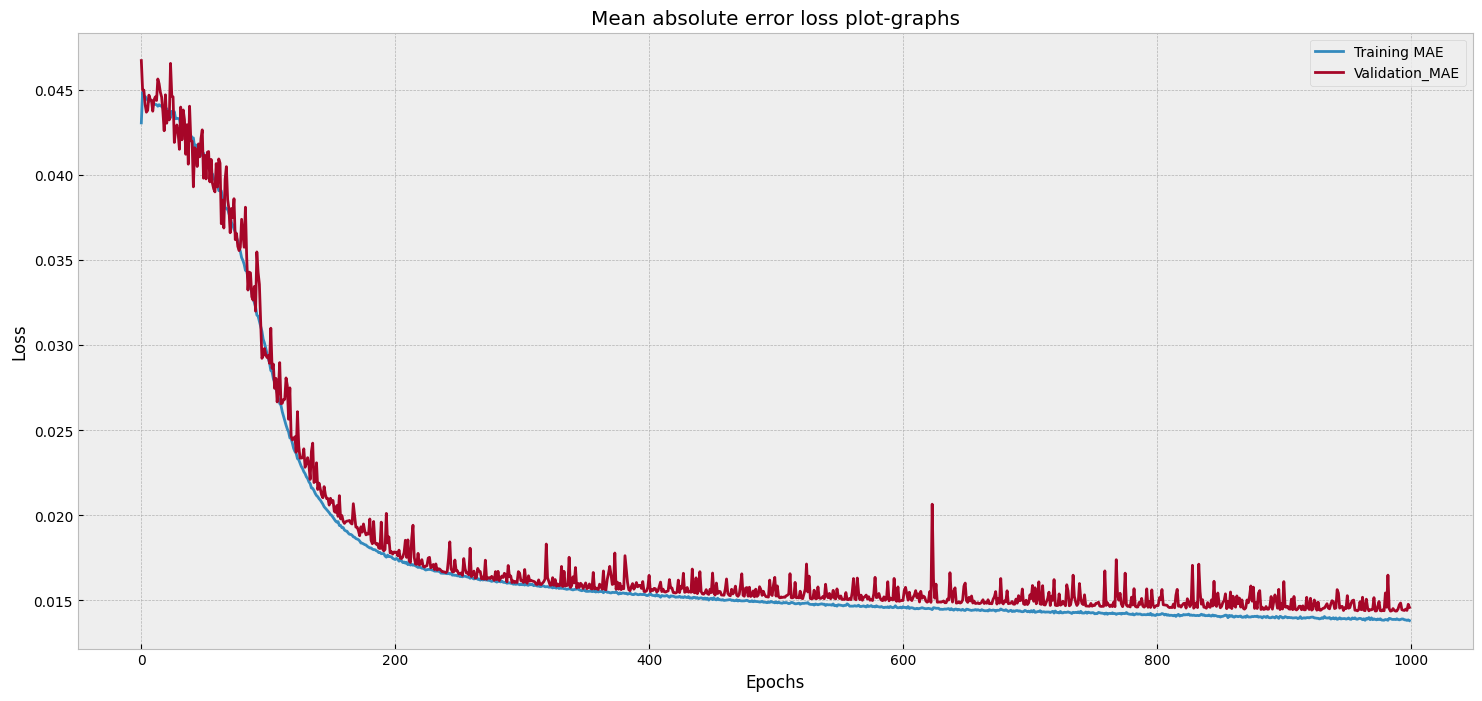

In [79]:
with plt.style.context(style='bmh'):
    plt.figure(figsize=(18,8))
    plt.plot(history.history["loss"],label="Training MSE")
    plt.plot(history.history["val_loss"],label="Validation MSE")
    plt.title(label="Mean squared error loss plot-graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Accuracy')
    plt.legend()
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history.history["mae"],label="Training MAE")
    plt.plot(history.history["val_mae"],label="Validation_MAE")
    plt.title(label="Mean absolute error loss plot-graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Loss')
    plt.legend()
    plt.show()

In [80]:
model_pred=bigru_model.predict(X_test,batch_size=16,verbose=1)
model_pred=model_pred.ravel()
print(model_pred)

75/75 [==============================] - 2s 3ms/step
[0.0921023  0.03851127 0.05213324 ... 0.00854905 0.3329018  0.01347917]


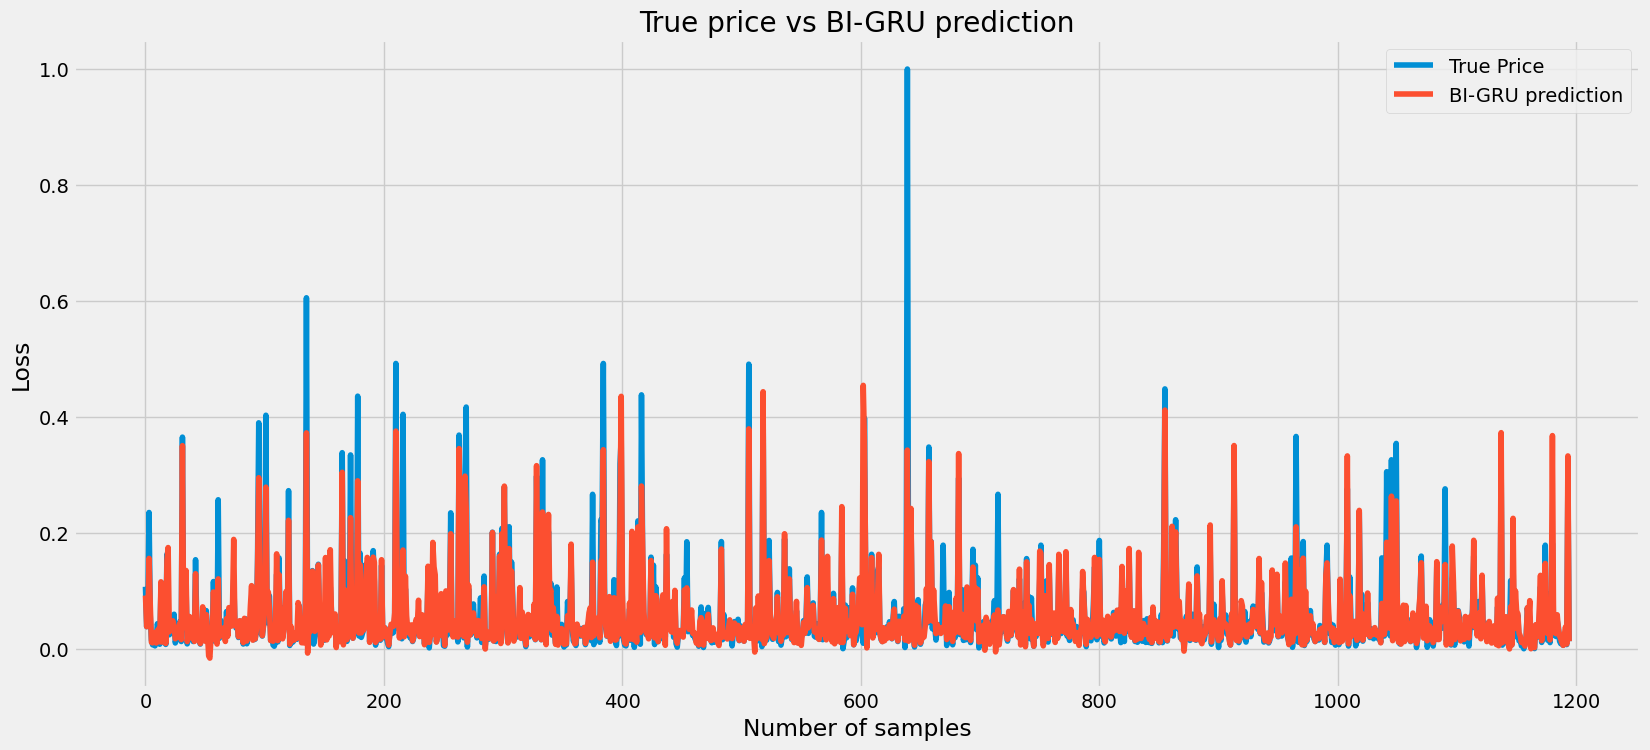

In [81]:
result_df['BI-GRU prediction']=model_pred
with plt.style.context(style='fivethirtyeight'):
    result_df[['True Price','BI-GRU prediction']].plot(figsize=(18,8))
    plt.title(label='True price vs BI-GRU prediction')
    plt.xlabel(xlabel='Number of samples')
    plt.ylabel(ylabel='Loss')
    plt.show()

In [82]:
MSE=mean_squared_error(y_true=result_df['True Price'].values.ravel(),y_pred=result_df['BI-GRU prediction'].values.ravel())
MAE=mean_absolute_error(y_true=result_df['True Price'].values.ravel(),y_pred=result_df['BI-GRU prediction'].values.ravel())
R2_SCORE=r2_score(y_true=result_df['True Price'].values.ravel(),y_pred=result_df['BI-GRU prediction'].values.ravel())
print(f'Mean Squared Error: {MSE:.5f}%')
print(f'Mean Absolute Error: {MAE:.5f}%')
print(f'R2 Score: {R2_SCORE*100.0:.2f}%')

Mean Squared Error: 0.00125%
Mean Absolute Error: 0.01459%
R2 Score: 78.20%


In [83]:
bigru_model.save("models/ConvolutionalBiDirectionalGatedRecurrentUnit_model.h5")

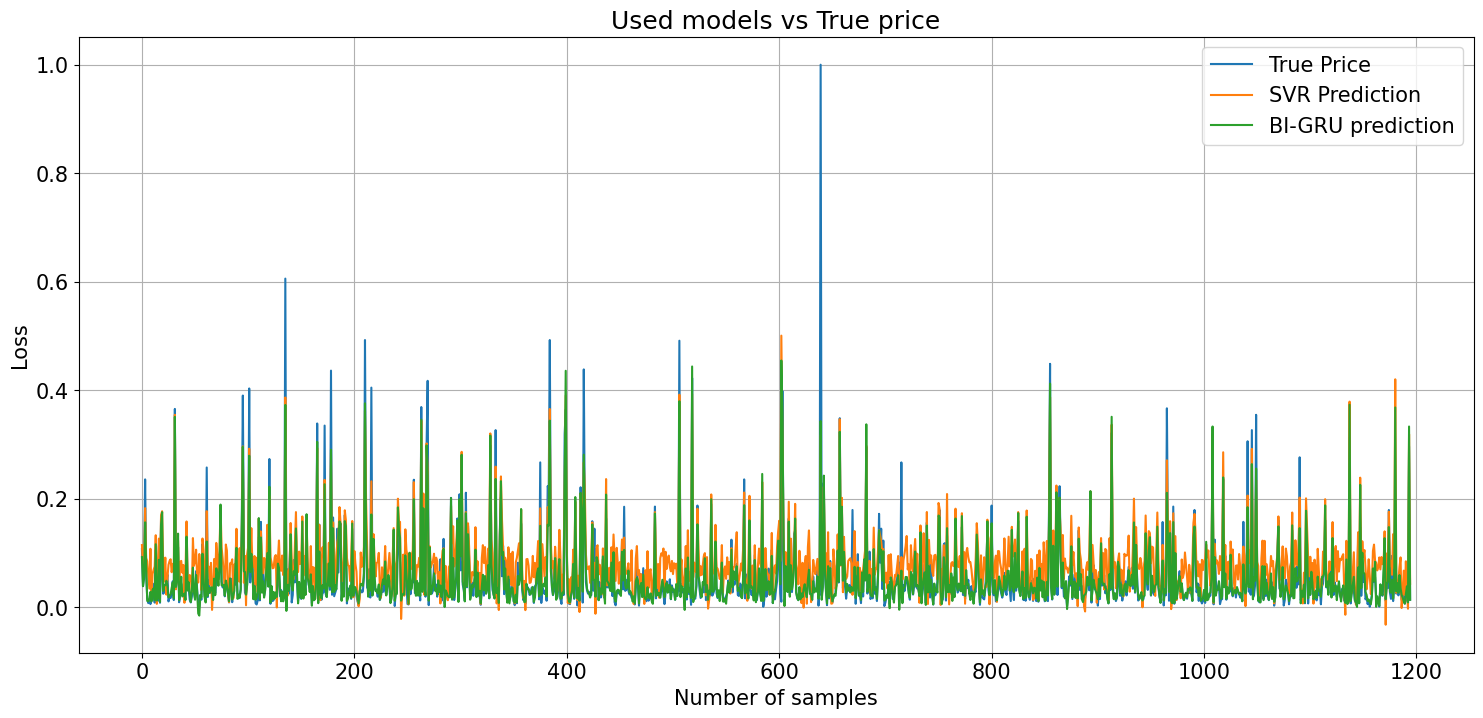

In [84]:
plt.rcParams['font.size']=15
result_df.plot(figsize=(18,8),fontsize=15)
plt.title(label="Used models vs True price")
plt.xlabel(xlabel='Number of samples')
plt.ylabel(ylabel='Loss')
plt.grid()
plt.show()

---